In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
#
tag = '.is5'
city_num = 15
#
resolution = 12
#
SUF = '.gl5'
dtype = 'float32'
gl5shape = (2160, 4320)
#
left = 28
right = 34
bottom = 37
top = 42
#
nx, ny = (right - left)*resolution, (top - bottom)*resolution
rgnshape = (ny, nx)
img_extent = (left, right, bottom, top)
#
upperindex = (90-top)*resolution
lowerindex = (90-bottom)*resolution
leftindex = (180+left)*resolution
rightindex = (180+right)*resolution
#
glbdir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city'
rgndir = f"/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region"

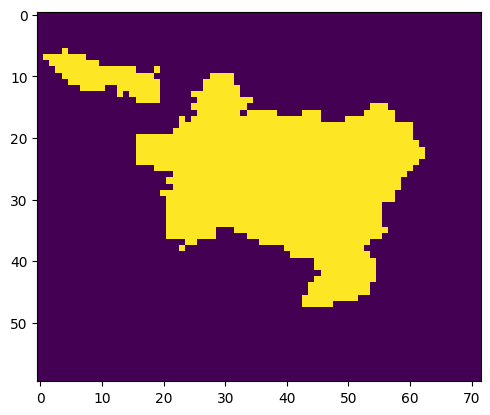

In [5]:
maskpath = f'{rgndir}/dat/lnd_msk_/lndmsk.CAMA{tag}'
lndmsk = np.fromfile(maskpath, dtype=dtype).reshape(rgnshape)
plt.imshow(lndmsk)
plt.show()

/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/riv_nxl_/masked/masked_00000015.CAMA.gl5 is saved


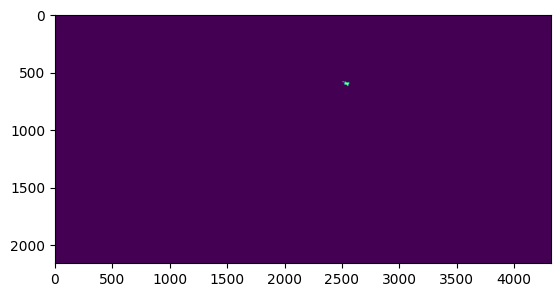

In [6]:
# save riv_nxl_ conversion input file
p0mis = 0

save_flag = True
if save_flag is True:
    loadfile = f"{glbdir}/dat//riv_nxl_/rivnxl.CAMA{SUF}"
    savefile = f"{rgndir}/dat/riv_nxl_/masked/masked_{city_num:08}.CAMA{SUF}"
    data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
    region = data[upperindex:lowerindex, leftindex:rightindex]
    region_masked = np.where(lndmsk==1, region, p0mis)
    masked = np.zeros(gl5shape)
    masked[upperindex:lowerindex, leftindex:rightindex] = region_masked
    plt.imshow(masked)
    masked.astype(np.float32).tofile(savefile)
    print(f"{savefile} is saved")

In [7]:
# instead of prep_lnd_region.sh
rivseq_path = f"{glbdir}/dat/riv_seq_/rivseq.CAMA{SUF}"
rivnum_path = f"{glbdir}/dat/riv_num_/rivnum.CAMA{SUF}"
rivara_path = f"{glbdir}/dat/riv_ara_/rivara.CAMA{SUF}"
rivnxd_path = f"{glbdir}/dat/riv_nxd_/rivnxd.CAMA{SUF}"
rivmou_path = f"{glbdir}/dat/riv_mou_/rivmou.CAMA{SUF}"
elevtn_path = f"{glbdir}/dat/elv_min_/elevtn.CAMA{SUF}"
lndara_path = f"{glbdir}/dat/lnd_ara_/lndara.CAMA{SUF}"
path_list_load = [rivseq_path, rivnum_path, rivara_path, rivnxd_path, rivmou_path, elevtn_path, lndara_path]

rivseq_path = f"{rgndir}/dat/riv_seq_/rivseq.CAMA{tag}"
rivnum_path = f"{rgndir}/dat/riv_num_/rivnum.CAMA{tag}"
rivara_path = f"{rgndir}/dat/riv_ara_/rivara.CAMA{tag}"
rivnxd_path = f"{rgndir}/dat/riv_nxd_/rivnxd.CAMA{tag}"
rivmou_path = f"{rgndir}/dat/riv_mou_/rivmou.CAMA{tag}"
elevtn_path = f"{rgndir}/dat/elv_min_/elevtn.CAMA{tag}"
lndara_path = f"{rgndir}/dat/lnd_ara_/lndara.CAMA{tag}"
path_list_save = [rivseq_path, rivnum_path, rivara_path, rivnxd_path, rivmou_path, elevtn_path, lndara_path]

In [8]:
# save the files
p0mis = 0

save_flag = True
if save_flag is True:
    for loadfile, savefile in zip(path_list_load, path_list_save):
        print(loadfile)
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        region = data[upperindex:lowerindex, leftindex:rightindex]
        region_masked = np.where(lndmsk==1, region, p0mis)
        region_masked.astype(np.float32).tofile(savefile)
        print(f"{savefile} is saved")

/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/riv_seq_/rivseq.CAMA.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/riv_seq_/rivseq.CAMA.is5 is saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/riv_num_/rivnum.CAMA.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/riv_num_/rivnum.CAMA.is5 is saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/riv_ara_/rivara.CAMA.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/riv_ara_/rivara.CAMA.is5 is saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/riv_nxd_/rivnxd.CAMA.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/riv_nxd_/rivnxd.CAMA.is5 is saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/riv_mou_/rivmou.CAMA.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/riv_mou_/rivmou.CAMA.is5 is saved
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/elv_min_/elevtn.CAMA.gl5
/mnt/c/Users/tsimk/Downloads/dotfiles/h08/region/dat/elv_min_/elevt

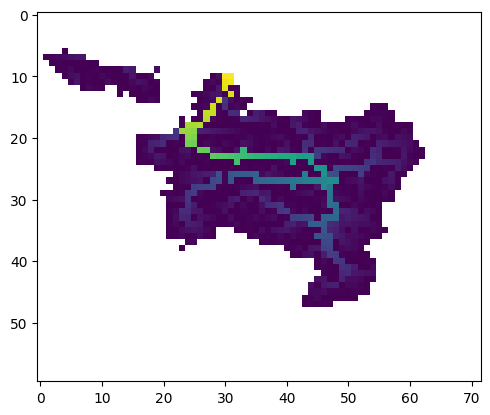

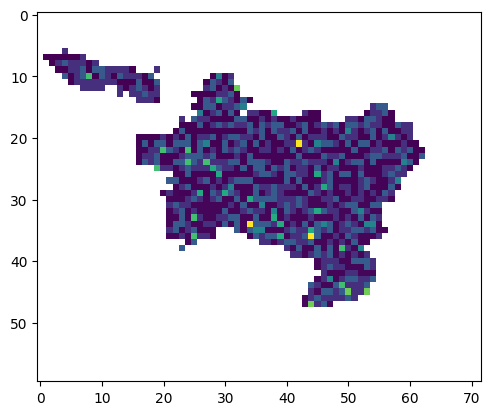

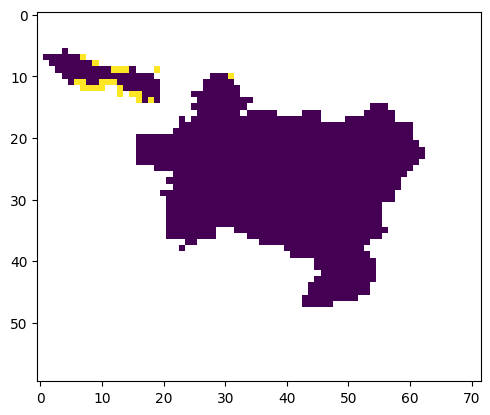

In [9]:
# view the files
tmppath = f'{rgndir}/dat/riv_seq_/rivseq.CAMA{tag}'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = f'{rgndir}/dat/riv_nxd_/rivnxd.CAMA{tag}'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()
tmppath = f'{rgndir}/dat/riv_mou_/rivmou.CAMA{tag}'
tmpimg = np.fromfile(tmppath, dtype=dtype).reshape(rgnshape)
tmpnew = np.ma.masked_where(tmpimg<=0, tmpimg)
plt.imshow(tmpnew)
plt.show()